# 

In [1]:
import os
import sys
import numpy as np
import swyft
import matplotlib.pyplot as plt
import copy
sys.path.append('/home/gertwk/ALPs_with_SWYFT/analysis_scripts/ALP_sim')

In [2]:
main_dir_name = "ALPs_with_SWYFT"
main_dir = os.getcwd().split(main_dir_name)[0]+main_dir_name+"/"
thesis_figs_dir = main_dir+"thesis_figures/"
irf_dir = main_dir+"IRFs/"
scripts_dir = main_dir+"analysis_scripts/ALP_sim/" # The directory where ALP_quick_sim.py is placed. Can be empty if it's in same folder as notebook.

In [3]:
irf_file = irf_dir+"CTA/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits"    # The path to the IRF_file (relative to this notebook)

In [4]:
if scripts_dir : sys.path.append(scripts_dir ) 
from ALP_quick_sim import ALP_sim

In [5]:
A = ALP_sim(set_null=False,set_obs=False)

In [6]:
A.configure_obs(
    signal = True,
    edisp = True,
    bkg = True,
    emin = 2e1,
    emax = 6e3,
    nbins = 90,
    nbins_etrue = 180,
    pointing = [150.58,-13.26],
    livetime=0.1,
    irf_file = irf_file,
    geom = 'gamma',    
)

A.configure_model(
    model = "",
    noise = "poisson",
    params = [0,0],
    log_params = [0,0],
    null_params = [0,0],  #should have been 'standard_params'
    signal = True,
    bkg = True,
    logcounts = False,
    residuals = False,
    floor = 10**(-1.15),
    floor_obs = 10**(-1.15),
    ALP_seed = 0,
    noise_seed = 0, 
)

A.configure_plot(
    xmin = None,
    xmax = None,
    ymin = None,
    ymax = None,
    logx = True,
    logy = True,
    legend = True,
    dnde = False,
)

/home/gertwk/ALPs_with_SWYFT/analysis_scripts/ALP_sim/ALP_quick_sim.py:475: UserWarning: The number of model parameters, log-indicators, null-hypothesis parameters, parameter names and parameter units are not equal
  warnings.warn("The number of model parameters, log-indicators, null-hypothesis parameters, parameter names and parameter units are not equal")


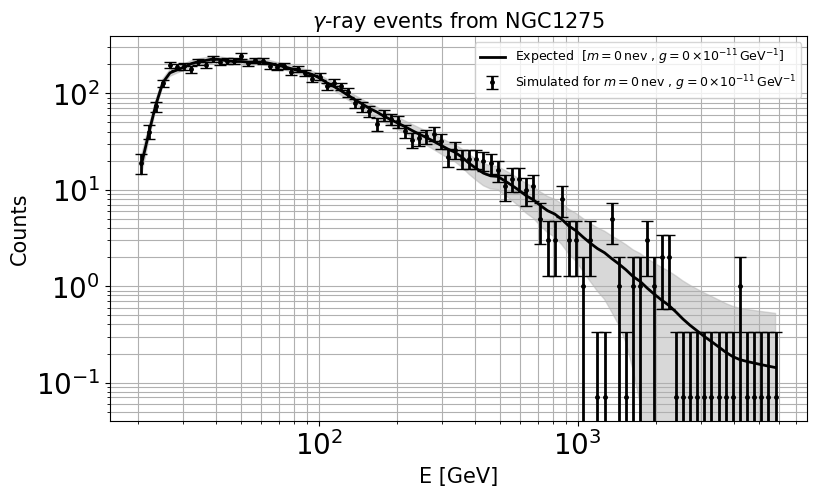

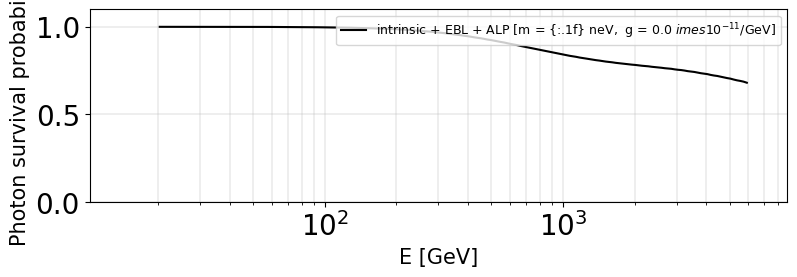

In [7]:
A.compute_case(
    new_fig = True,
    new_counts = True,
    null = False,
    plot_obs = True,
    plot_exp = True,
    plot_survival = True,
    errorbands = True,
    errors = True,
    linestyle = "-",
    linestyle_obs = "-", 
    label_exp = True,
    label_obs = True,
    label_survival = True,
    transparency = 0,
    axes = None,
    axes_survival = None,
)

TypeError: compute_case() got an unexpected keyword argument 'legend'

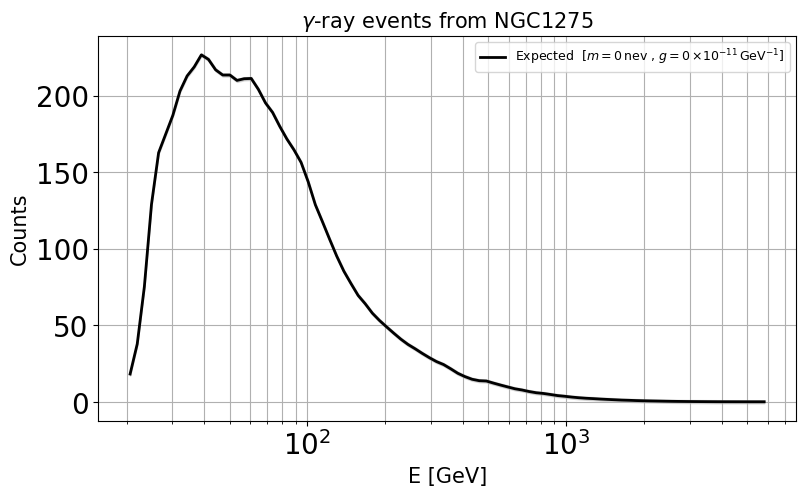

In [16]:
# Without ALPs, only expectations, not observations.
A.configure_model(ALP_seed=0, params = [0,0], residuals = False)
A.compute_case(new_fig=1,new_counts=1,plot_obs=0,color="k",linestyle="-",)

#With ALPs, observations included.
A.configure_model(params = [10,10])  # Configuring the model parameters doesn't affect the use of A.model(). Other arguments of A.configure_model() do however affect A.model. 
A.compute_case(new_fig=0,new_counts=1,plot_obs=1,color="r",linestyle="-")

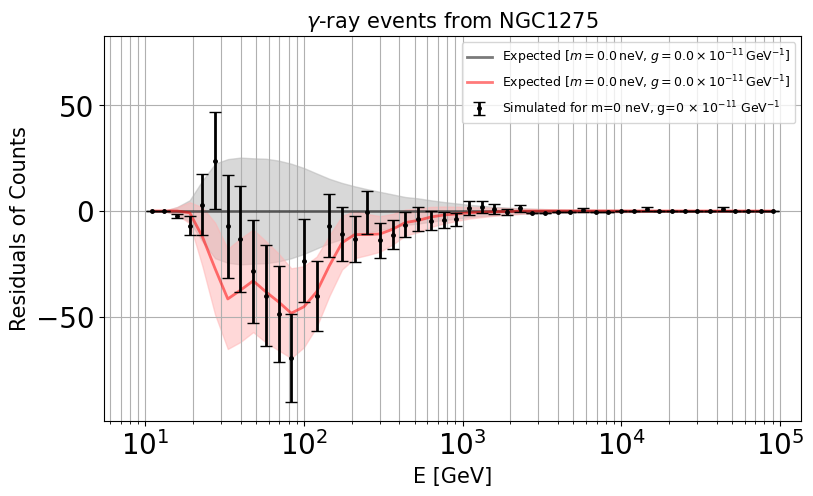

In [13]:
#A.configure_plot(ymin=-30, ymax=20)
A.configure_plot(ymin=None, ymax=None)

# Without ALPs, only expectations, not observations.
A.configure_model(params = [0,0], residuals=True)
A.compute_case(new_fig=1,new_counts=1,plot_obs=0,color="k",linestyle="-",legend=1, model="")

# With ALPs, observations included.
A.configure_model(ALP_seed=0, params = [10,10], residuals=True)   
A.compute_case(new_fig=0,new_counts=1,plot_obs=1,color="r",linestyle="-",legend=1, model="")



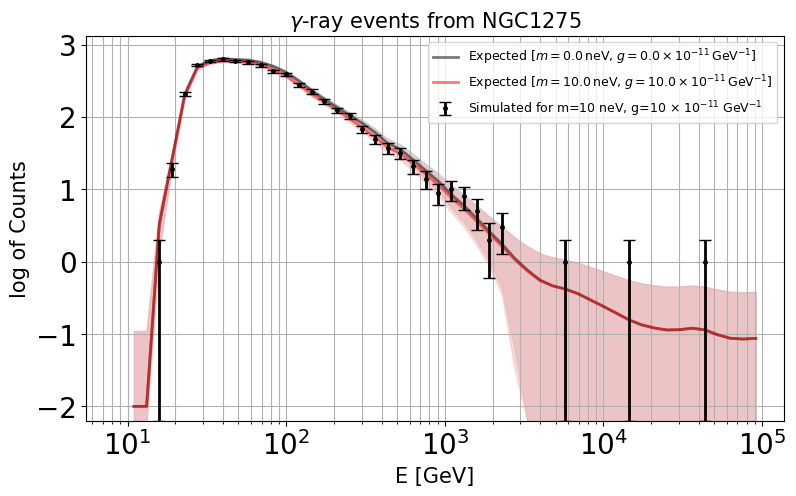

In [14]:
A.configure_plot(ymin=None, ymax=None)

# Without ALPs, only expectations, not observations.
A.configure_model(params = [0,0], residuals=False, logcounts=True)
A.compute_case(new_fig=1,new_counts=1,plot_obs=0,color="k",linestyle="-",legend=1, model="")

# With ALPs, observations included.
A.configure_model(ALP_seed=0, params = [10,10], residuals=False, logcounts=True)   
A.compute_case(new_fig=0,new_counts=1,plot_obs=1,color="r",linestyle="-",legend=1, model="")

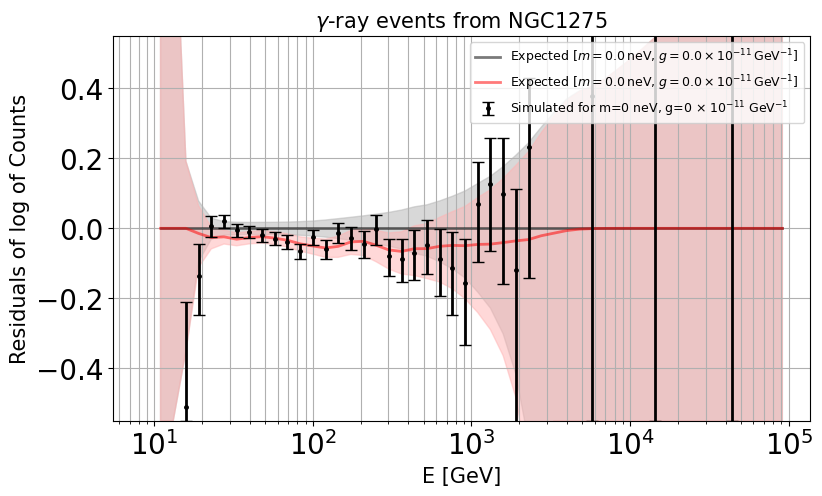

In [15]:
A.configure_plot(ymin=-0.5, ymax=0.5)

# Without ALPs, only expectations, not observations.
A.configure_model(params = [0,0], residuals=True, logcounts=True)
#A.generate_null()
A.compute_case(new_fig=1,new_counts=1,plot_obs=0,color="k",linestyle="-",legend=1, model="")

# With ALPs, observations included.
A.configure_model(ALP_seed=0, params = [10,10], residuals=True, logcounts=True)   
A.compute_case(new_fig=0,new_counts=1,plot_obs=1,color="r",linestyle="-",legend=1, model="")

In [16]:
# Import the results from ealier
A.import_obs(obs=simulated_observation, exp=expected_observation)

# Configuring the parameters is now only to make sure the labels turn out right.
A.configure_model(params=[0,0])

A.compute_case(new_fig=1,new_counts=1,plot_obs=1,color="k",linestyle="-",legend=1, model="")


AttributeError: 'ALP_sim' object has no attribute 'import_obs'